<a href="https://colab.research.google.com/github/popgenDK/evalPopStructure/blob/main/evalPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Load evalPCAfunctions for plotting


In [73]:
#function plotCorRres for plotting correlations
source("https://raw.githubusercontent.com/popgenDK/evalPopStructure/main/R/evalPCA.R")




## Load test data

In [74]:

#load genetic test data
load(url("http://pontus.popgen.dk/albrecht/open/admixTjeck/data.Rdata"))

## summaries data



In [75]:

#transpose genotype
g <- t(geno)

cat("\ngenotype matrix (g)\n")
dim(g)

cat("\nNumber of Individuals\n")
(N <- ncol(g))

cat("\nNumber of SNPs\n")
( M <- nrow(g))




cat("\n number of individual in each population\n")
pop <- as.factor(pop)
table(pop)


genotype matrix (g)


[1] 54048   374


Number of Individuals


[1] 374


Number of SNPs


[1] 54048


 number of individual in each population


pop
CEU CHB MXL YRI 
 99 103  64 108 

# PCA1 method. Chen and Storey 
There is no centering and the diagonal of the coverance has the mean heterozygoisty subtracted





no missing genotypes


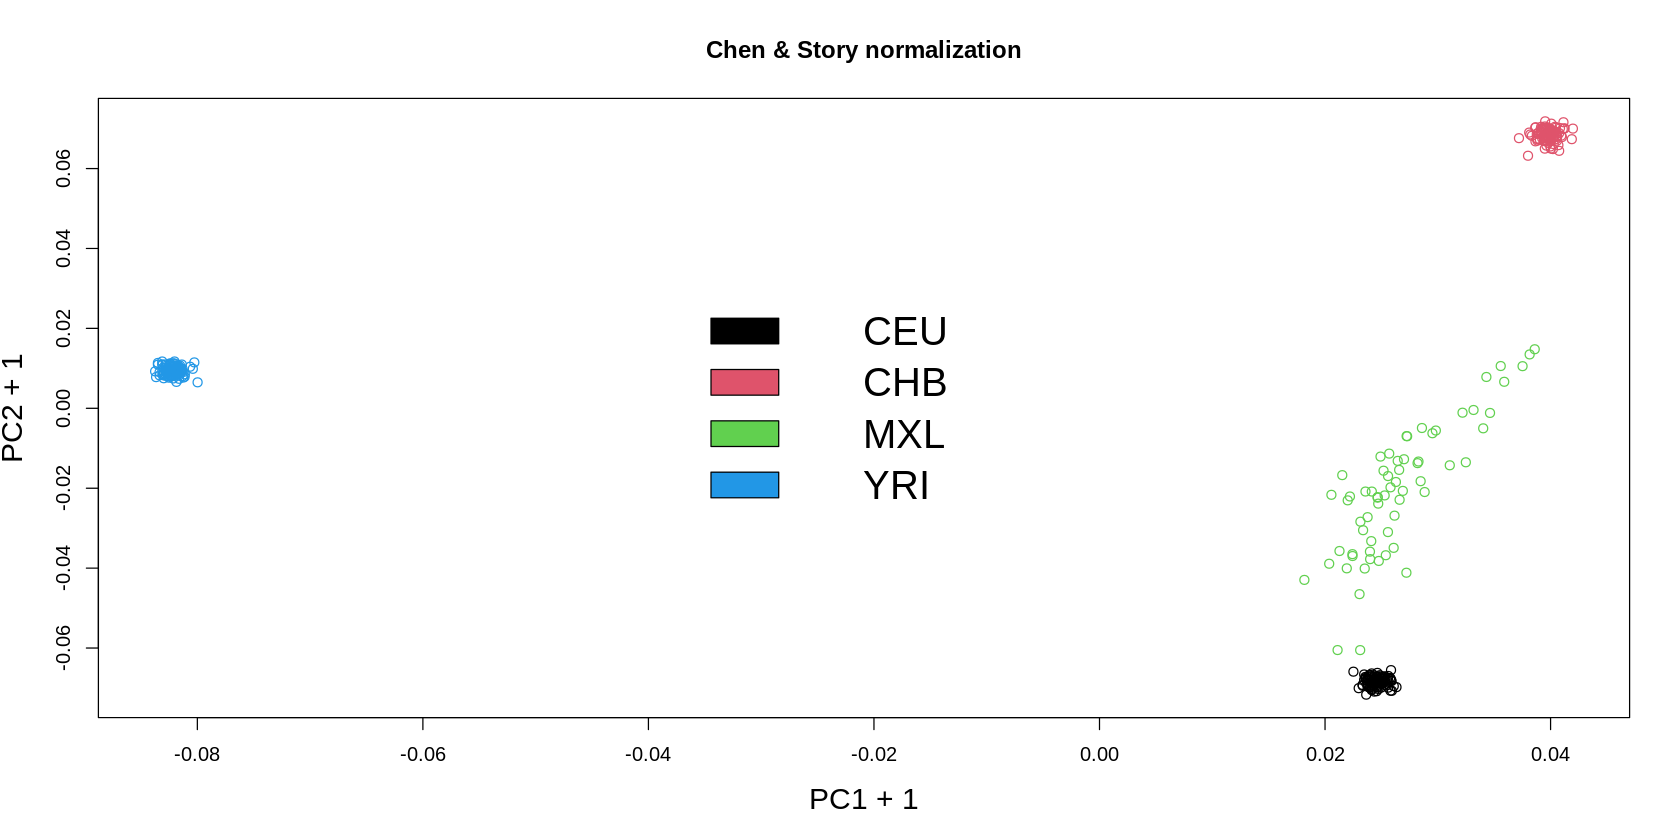

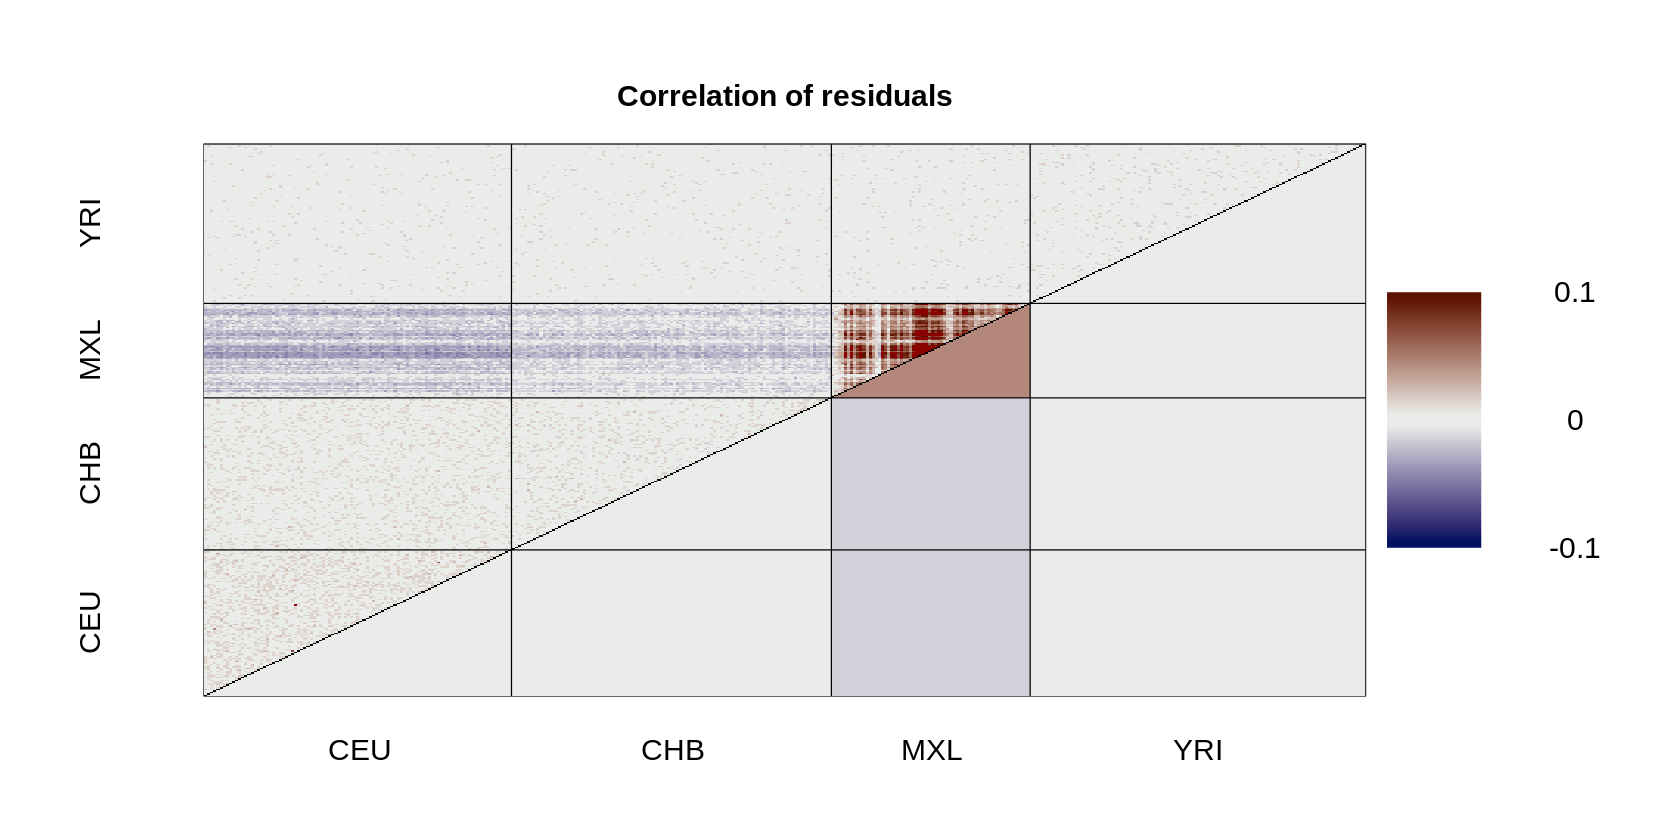

In [76]:

 pca1 <- makePCA(g,method="CS")
 plot(pca1$vectors[,1:2+1],col=pop,xlab="PC1 + 1",ylab="PC2 + 1",cex.lab=1.5,main="Chen & Story normalization")
 legend("center",fill=1:4,levels(pop),cex=2,bty="n")


 res1 <- evalPCA(pca1,k=3)
 plotCorRes(res1$corres, pop,max=0.1)


## Standard PCA with centered gentoyeps


no missing genotypes


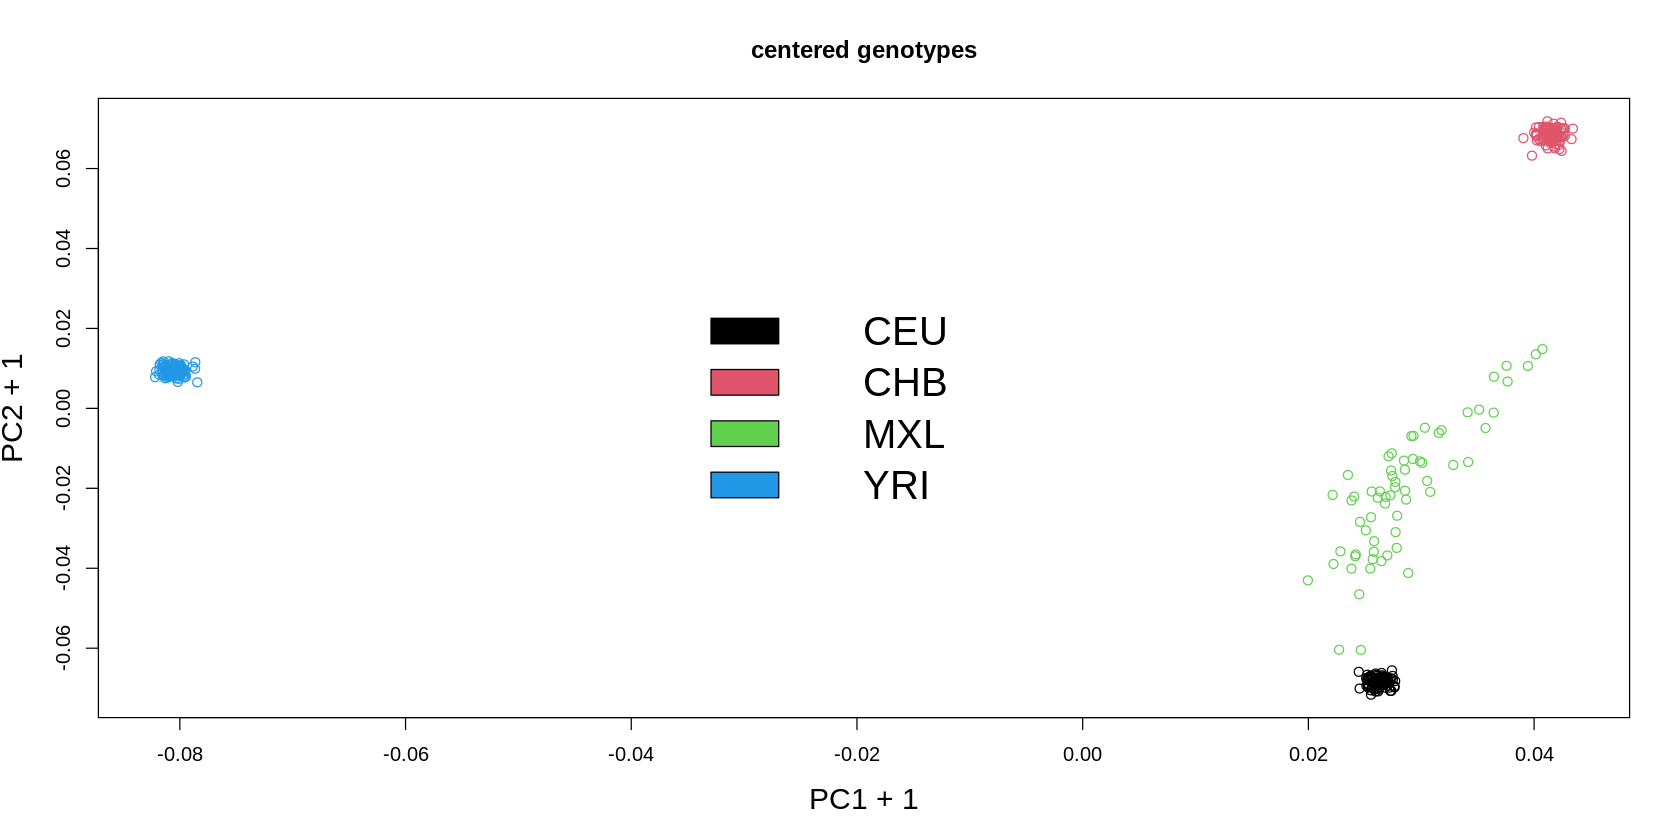

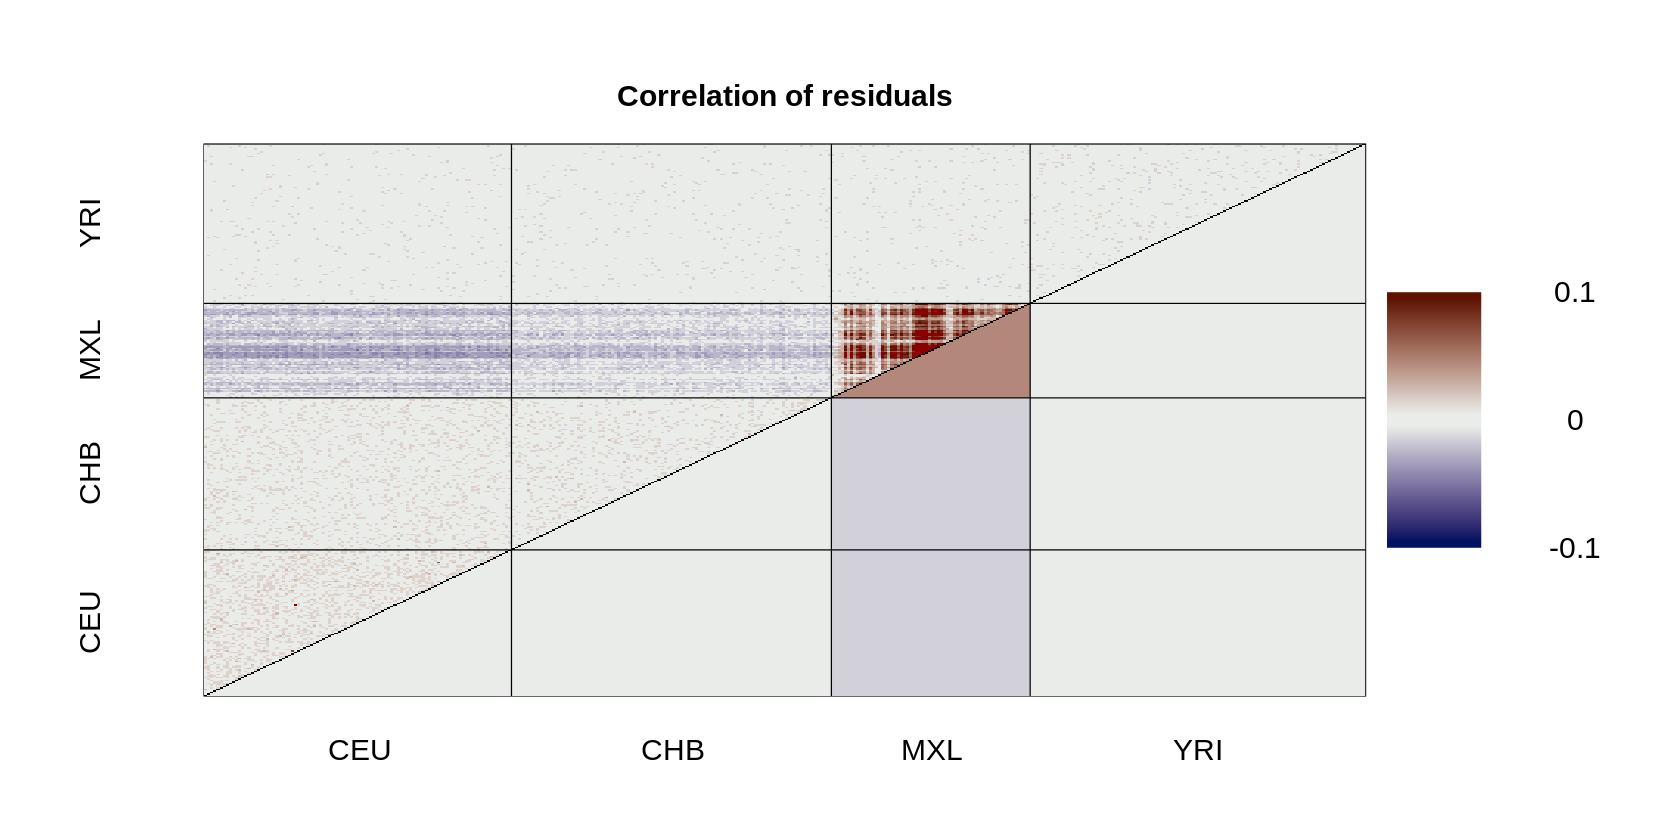

In [77]:

 pca2 <-  makePCA(g,method="standard",center=TRUE,scale=FALSE)
 plot(pca2$vectors[,1:2],col=pop,xlab="PC1 + 1",ylab="PC2 + 1",cex.lab=1.5,main="centered genotypes")
 legend("center",fill=1:4,levels(pop),cex=2,bty="n")


 res2 <- evalPCA(pca2,k=2)
 plotCorRes(res2$corres, pop,max=0.1)

##Perform PCA with *centering* and scaling


no missing genotypes


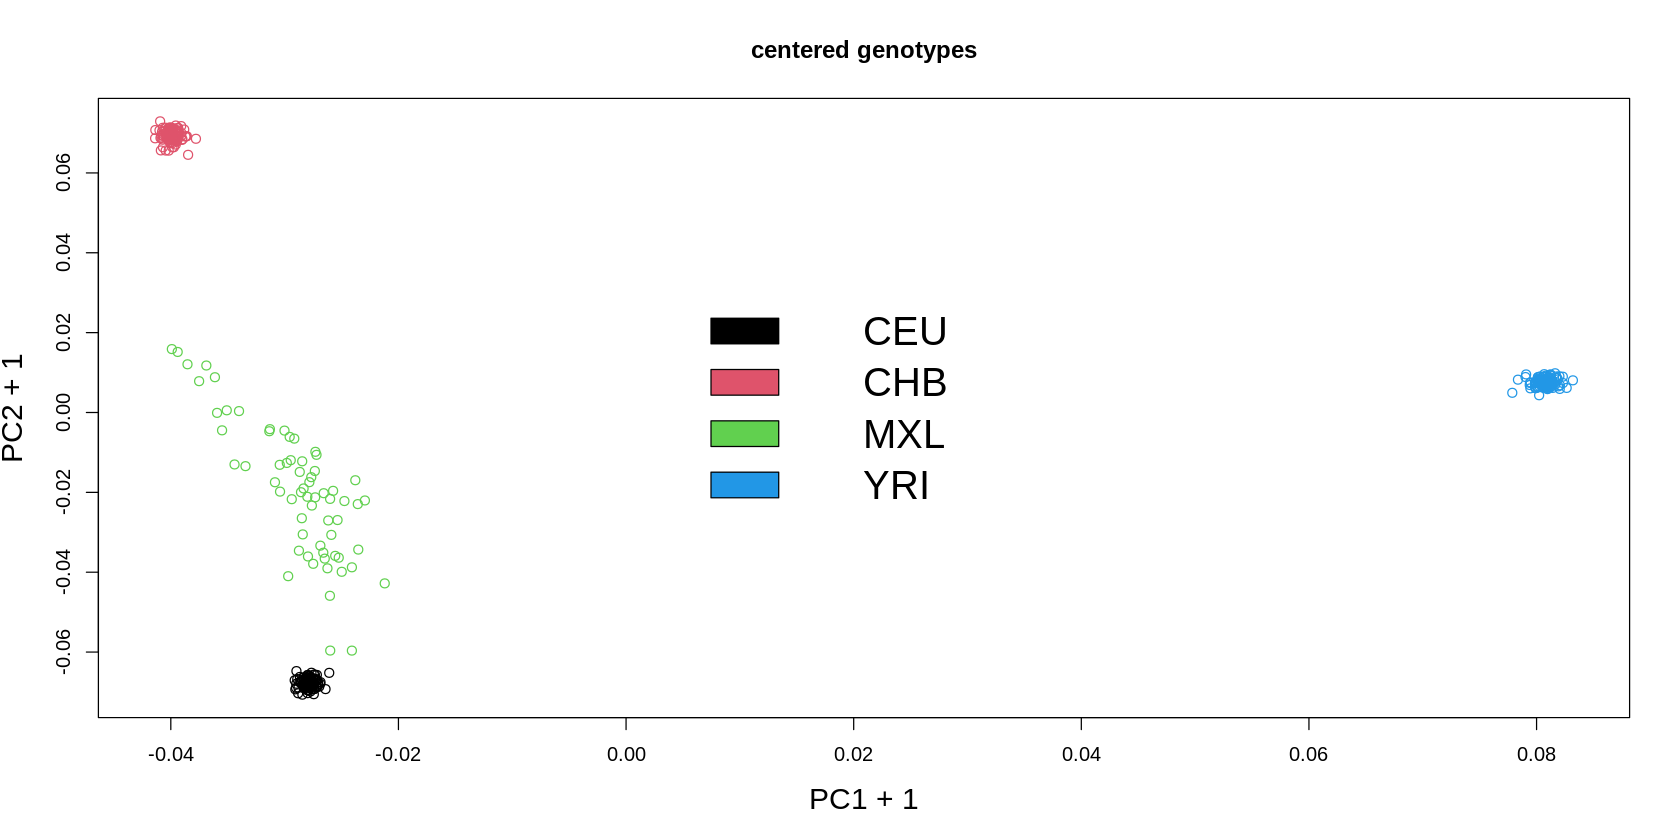

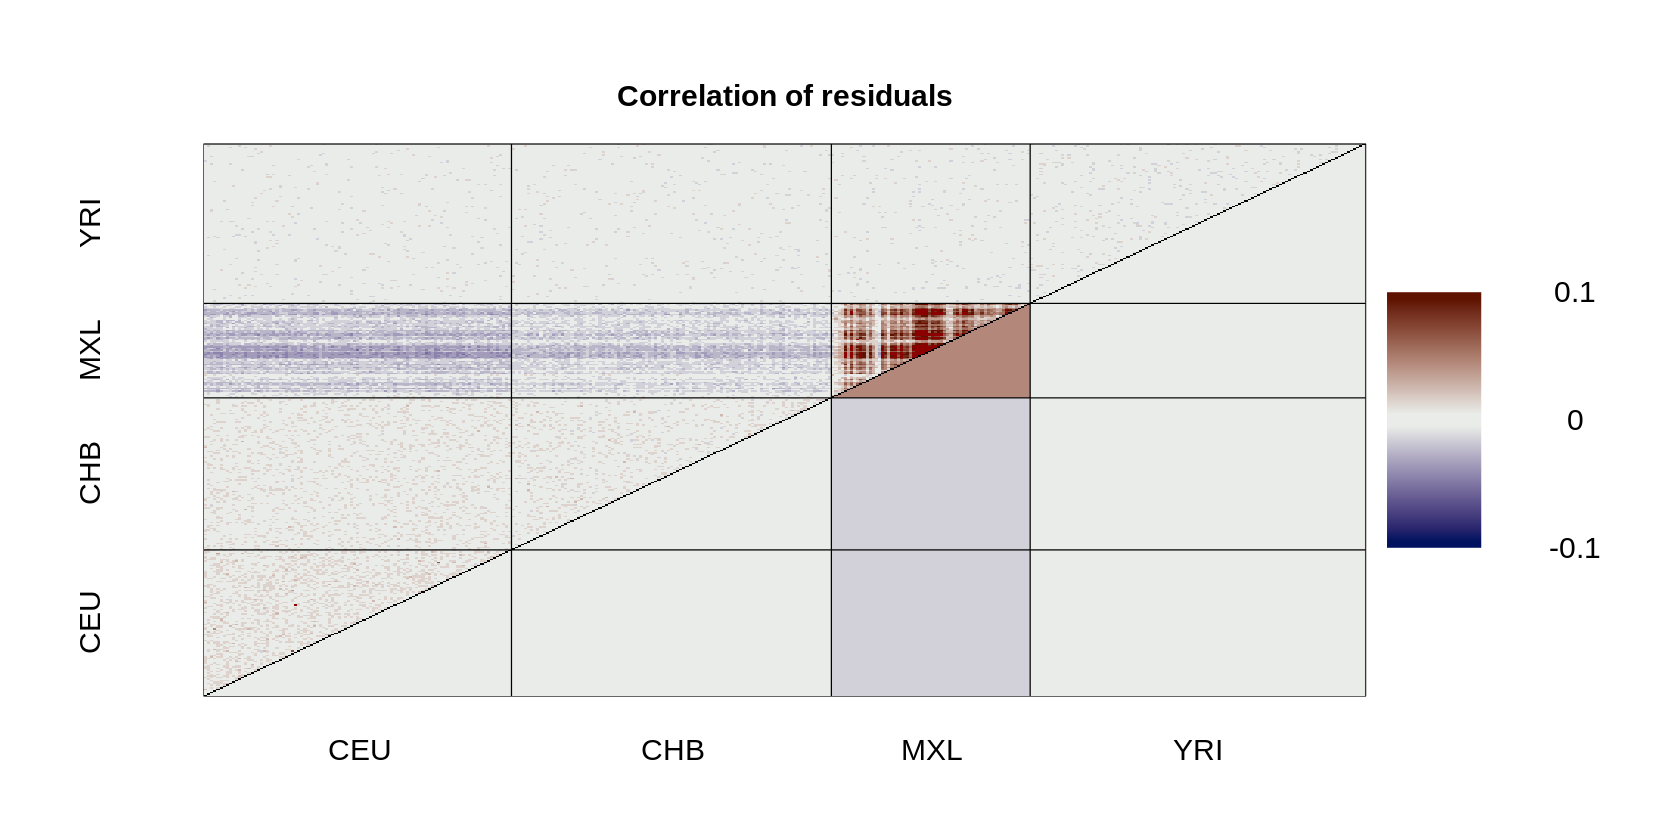

In [83]:

 pca3 <- makePCA(g,method="standard",center=TRUE,scale=TRUE)
 plot(pca3$vectors[,1:2],col=pop,xlab="PC1 + 1",ylab="PC2 + 1",cex.lab=1.5,main="centered genotypes")
 legend("center",fill=1:4,levels(pop),cex=2,bty="n")

 res3 <- evalPCA(pca3,k=2)
 plotCorRes(res3$corres, pop,max=0.1)


## evalulation of admixture proportions (e.g. ADMIXTURE)

In [79]:

get_p_hat_k_fromq <- function(q){
    # function to calculate p_hat_k from an estimate of admixture proportions k

    Qhat <- t(q)
    return(t(Qhat) %*% inv(Qhat %*% t(Qhat)) %*% Qhat)

}

get_p_hat_k_frompi <- function(pi_hat, k){
    # function to calculate p_hat_k from an estimate of pi
    # pi_hat is M x N matrix with estiamte of individual allele frequencies
    # k is number of populations
    
    M <- nrow(pi_hat)
    pi_tilde_k <- pi_hat[sample(M, k),] # select random k rows (i.e. sites) from pi. I don't understand this. 
    p_hat_k <- t(pitilde) %*% inv(pitilde %*% t(pitilde)) %*% pitilde 
    return(p_hat_k)

}
